In [1]:
using LinearAlgebra
using PyPlot

In [2]:
# Discrete dynamics
h = 0.1   # time step
B = [0.5*h*h; h]
A = I + [0 1; 0 0]*h

2×2 Array{Float64,2}:
 1.0  0.1
 0.0  1.0

In [4]:
nx= 2      # number of states
nu = 1     # number of controls
Tf = 5.0   # final time
N = Int(Tf/h)+1    # number of time steps
times = Array(range(0,Tf, step=h));

In [5]:
x0 = [1.0; 0.0]  # initial state
xs = [0.0; 0.0]  # target state

2-element Array{Float64,1}:
 0.0
 0.0

In [6]:
# Cost weights
Q = 1.0*I(nx)
R = 0.1*I(nu)
Qf = 1.0*I(nx)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅ 
  ⋅   1.0

In [7]:
function get_J(xhist,uhist)
    cost = 0.5*(xhist[:,end]-xs)'*Qf*(xhist[:,end]-xs)
    for k = 1:(N-1)
        cost = cost + 0.5*(xhist[:,k]-xs)'*Q*(xhist[:,k]-xs) + 0.5*uhist[:,k]'*R*uhist[:,k]
    end
    return cost
end

get_J (generic function with 1 method)

In [8]:
function forward_rollout(xhist, uhist)
    xnew = zeros(nx,N)
    xnew[:,1] = xhist[:,1]
    for k = 1:(N-1)
        xnew[:,k+1] .= A*xnew[:,k] + B.*(uhist[:,k])
    end
    return xnew
end

forward_rollout (generic function with 1 method)

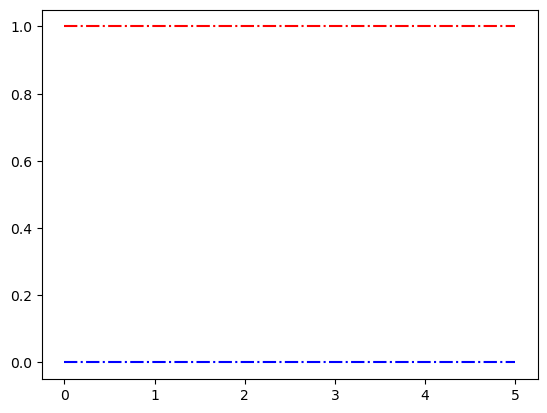

25.5

In [16]:
# initial guess
x_hist = repeat(x0, 1, N)
u_hist = zeros(nu, N-1)
x_hist = forward_rollout(x_hist, u_hist)
plot(times, x_hist[1,:],"r-.")
plot(times, x_hist[2,:],"b-.")
cost = get_J(x_hist,u_hist)

In [17]:
λ_hist = zeros(nx, N)
Δu = ones(nu, N-1)
β = 0.01  # for line search torlerance
α = 1.0
ϕ = 0.5
ϵ = 1e-2
iter = 0
while maximum(abs.(Δu[1,:])) > ϵ && iter < 2000
    # backword pass
    λ_hist[:,end] = Qf * x_hist[:,end]
    for i = N-1:-1:1
        Δu[:, i] = -u_hist[:, i]-R\B'*λ_hist[:, i+1]
        λ_hist[:, i] = Q*x_hist[:, i] + A' * λ_hist[:, i+1]
        
    end
    
    # forward pass
    u_new = u_hist .+ α .* Δu
    x_new  = forward_rollout(x_hist, u_new)
    while get_J(x_new, u_new) > get_J(x_hist, u_hist) - β * α * norm(Δu) * norm(Δu)
        α = ϕ * α
        u_new = u_hist + α .* Δu
        x_new  = forward_rollout(x_hist, u_new)
    end
    u_hist .= u_new
    x_hist .= x_new
    iter = iter + 1
    cst = get_J(x_new, u_new)
    println("Iter: $iter || Cost: $cst")
end

Iter: 1 || Cost: 12.65695651440442
Iter: 2 || Cost: 11.601490342849296
Iter: 3 || Cost: 11.158040574771881
Iter: 4 || Cost: 10.787217093475563
Iter: 5 || Cost: 10.458200343737872
Iter: 6 || Cost: 10.165053227930526
Iter: 7 || Cost: 9.903553592501028
Iter: 8 || Cost: 9.670025624151064
Iter: 9 || Cost: 9.461229104576711
Iter: 10 || Cost: 9.274305683929859
Iter: 11 || Cost: 9.106733611249902
Iter: 12 || Cost: 8.956287924001188
Iter: 13 || Cost: 8.821005354992927
Iter: 14 || Cost: 8.699153393570079
Iter: 15 || Cost: 8.589203008977421
Iter: 16 || Cost: 8.489804602276191
Iter: 17 || Cost: 8.399766804547541
Iter: 18 || Cost: 8.318037784382284
Iter: 19 || Cost: 8.243688767560641
Iter: 20 || Cost: 8.175899507004466
Iter: 21 || Cost: 8.113945472098914
Iter: 22 || Cost: 8.057186553820355
Iter: 23 || Cost: 8.005057106212137
Iter: 24 || Cost: 7.957057165998398
Iter: 25 || Cost: 7.912744710859637
Iter: 26 || Cost: 7.871728833408978
Iter: 27 || Cost: 7.833663722466933
Iter: 28 || Cost: 7.798243356068

Iter: 243 || Cost: 6.739010250929803
Iter: 244 || Cost: 6.738348123228118
Iter: 245 || Cost: 6.737692539769543
Iter: 246 || Cost: 6.73704341982638
Iter: 247 || Cost: 6.736400683935575
Iter: 248 || Cost: 6.735764253873912
Iter: 249 || Cost: 6.735134052633907
Iter: 250 || Cost: 6.734510004400191
Iter: 251 || Cost: 6.7338920345264315
Iter: 252 || Cost: 6.73328006951284
Iter: 253 || Cost: 6.732674036984132
Iter: 254 || Cost: 6.7320738656680374
Iter: 255 || Cost: 6.731479485374269
Iter: 256 || Cost: 6.730890826973983
Iter: 257 || Cost: 6.730307822379715
Iter: 258 || Cost: 6.729730404525758
Iter: 259 || Cost: 6.729158507348945
Iter: 260 || Cost: 6.728592065769965
Iter: 261 || Cost: 6.728031015674969
Iter: 262 || Cost: 6.727475293897707
Iter: 263 || Cost: 6.726924838201948
Iter: 264 || Cost: 6.726379587264413
Iter: 265 || Cost: 6.725839480657967
Iter: 266 || Cost: 6.725304458835255
Iter: 267 || Cost: 6.724774463112704
Iter: 268 || Cost: 6.724249435654821
Iter: 269 || Cost: 6.723729319458861
I

Iter: 506 || Cost: 6.670751272651015
Iter: 507 || Cost: 6.670672002610624
Iter: 508 || Cost: 6.670593278942069
Iter: 509 || Cost: 6.670515097434588
Iter: 510 || Cost: 6.670437453914218
Iter: 511 || Cost: 6.670360344243462
Iter: 512 || Cost: 6.670283764320882
Iter: 513 || Cost: 6.67020771008078
Iter: 514 || Cost: 6.6701321774928175
Iter: 515 || Cost: 6.6700571625616805
Iter: 516 || Cost: 6.6699826613267135
Iter: 517 || Cost: 6.669908669861597
Iter: 518 || Cost: 6.669835184273999
Iter: 519 || Cost: 6.66976220070525
Iter: 520 || Cost: 6.669689715329983
Iter: 521 || Cost: 6.669617724355846
Iter: 522 || Cost: 6.6695462240231524
Iter: 523 || Cost: 6.669475210604557
Iter: 524 || Cost: 6.669404680404761
Iter: 525 || Cost: 6.66933462976018
Iter: 526 || Cost: 6.669265055038644
Iter: 527 || Cost: 6.669195952639081
Iter: 528 || Cost: 6.6691273189912215
Iter: 529 || Cost: 6.6690591505552925
Iter: 530 || Cost: 6.668991443821742
Iter: 531 || Cost: 6.668924195310929
Iter: 532 || Cost: 6.66885740157281

Iter: 739 || Cost: 6.6612899132170655
Iter: 740 || Cost: 6.661272088526787
Iter: 741 || Cost: 6.661254370539479
Iter: 742 || Cost: 6.661236758569477
Iter: 743 || Cost: 6.661219251935907
Iter: 744 || Cost: 6.661201849962664
Iter: 745 || Cost: 6.661184551978345
Iter: 746 || Cost: 6.661167357316246
Iter: 747 || Cost: 6.6611502653142995
Iter: 748 || Cost: 6.661133275315055
Iter: 749 || Cost: 6.661116386665635
Iter: 750 || Cost: 6.661099598717717
Iter: 751 || Cost: 6.661082910827468
Iter: 752 || Cost: 6.661066322355527
Iter: 753 || Cost: 6.661049832666979
Iter: 754 || Cost: 6.661033441131326
Iter: 755 || Cost: 6.661017147122405
Iter: 756 || Cost: 6.661000950018424
Iter: 757 || Cost: 6.660984849201881
Iter: 758 || Cost: 6.660968844059551
Iter: 759 || Cost: 6.660952933982433
Iter: 760 || Cost: 6.660937118365742
Iter: 761 || Cost: 6.66092139660888
Iter: 762 || Cost: 6.66090576811538
Iter: 763 || Cost: 6.660890232292886
Iter: 764 || Cost: 6.660874788553117
Iter: 765 || Cost: 6.660859436311853
I

Iter: 1011 || Cost: 6.6588508213972
Iter: 1012 || Cost: 6.658847052581871
Iter: 1013 || Cost: 6.6588433043400075
Iter: 1014 || Cost: 6.658839576553967
Iter: 1015 || Cost: 6.6588358691068175
Iter: 1016 || Cost: 6.658832181882353
Iter: 1017 || Cost: 6.658828514765045
Iter: 1018 || Cost: 6.658824867640067
Iter: 1019 || Cost: 6.658821240393307
Iter: 1020 || Cost: 6.658817632911303
Iter: 1021 || Cost: 6.658814045081302
Iter: 1022 || Cost: 6.658810476791226
Iter: 1023 || Cost: 6.658806927929679
Iter: 1024 || Cost: 6.658803398385917
Iter: 1025 || Cost: 6.658799888049879
Iter: 1026 || Cost: 6.658796396812149
Iter: 1027 || Cost: 6.658792924563989
Iter: 1028 || Cost: 6.658789471197302
Iter: 1029 || Cost: 6.6587860366046465
Iter: 1030 || Cost: 6.658782620679219
Iter: 1031 || Cost: 6.658779223314856
Iter: 1032 || Cost: 6.658775844406062
Iter: 1033 || Cost: 6.658772483847899
Iter: 1034 || Cost: 6.6587691415361485
Iter: 1035 || Cost: 6.658765817367165
Iter: 1036 || Cost: 6.6587625112379385
Iter: 103

Iter: 1245 || Cost: 6.658348089505889
Iter: 1246 || Cost: 6.658347006375325
Iter: 1247 || Cost: 6.658345928863428
Iter: 1248 || Cost: 6.658344856940019
Iter: 1249 || Cost: 6.658343790575111
Iter: 1250 || Cost: 6.658342729738886
Iter: 1251 || Cost: 6.658341674401661
Iter: 1252 || Cost: 6.65834062453396
Iter: 1253 || Cost: 6.658339580106437
Iter: 1254 || Cost: 6.658338541089938
Iter: 1255 || Cost: 6.6583375074554585
Iter: 1256 || Cost: 6.658336479174143
Iter: 1257 || Cost: 6.658335456217322
Iter: 1258 || Cost: 6.65833443855647
Iter: 1259 || Cost: 6.658333426163235
Iter: 1260 || Cost: 6.658332419009394
Iter: 1261 || Cost: 6.658331417066912
Iter: 1262 || Cost: 6.658330420307898
Iter: 1263 || Cost: 6.658329428704609
Iter: 1264 || Cost: 6.658328442229477
Iter: 1265 || Cost: 6.658327460855059
Iter: 1266 || Cost: 6.6583264845540935
Iter: 1267 || Cost: 6.658325513299444
Iter: 1268 || Cost: 6.658324547064149
Iter: 1269 || Cost: 6.658323585821393
Iter: 1270 || Cost: 6.658322629544481
Iter: 1271 |

Iter: 1508 || Cost: 6.658191403806044
Iter: 1509 || Cost: 6.658191119925647
Iter: 1510 || Cost: 6.658190837459502
Iter: 1511 || Cost: 6.658190556400388
Iter: 1512 || Cost: 6.658190276741107
Iter: 1513 || Cost: 6.658189998474511
Iter: 1514 || Cost: 6.658189721593484
Iter: 1515 || Cost: 6.658189446090949
Iter: 1516 || Cost: 6.65818917195987
Iter: 1517 || Cost: 6.658188899193243
Iter: 1518 || Cost: 6.658188627784093
Iter: 1519 || Cost: 6.658188357725508
Iter: 1520 || Cost: 6.658188089010591
Iter: 1521 || Cost: 6.658187821632469
Iter: 1522 || Cost: 6.658187555584333
Iter: 1523 || Cost: 6.658187290859407
Iter: 1524 || Cost: 6.65818702745092
Iter: 1525 || Cost: 6.6581867653521725
Iter: 1526 || Cost: 6.658186504556498
Iter: 1527 || Cost: 6.658186245057236
Iter: 1528 || Cost: 6.658185986847774
Iter: 1529 || Cost: 6.6581857299215494
Iter: 1530 || Cost: 6.658185474272022
Iter: 1531 || Cost: 6.658185219892687
Iter: 1532 || Cost: 6.65818496677707
Iter: 1533 || Cost: 6.658184714918741
Iter: 1534 ||

Iter: 1768 || Cost: 6.6581497789865205
Iter: 1769 || Cost: 6.658149699967911
Iter: 1770 || Cost: 6.658149621331628
Iter: 1771 || Cost: 6.658149543075783
Iter: 1772 || Cost: 6.658149465198501
Iter: 1773 || Cost: 6.658149387697909
Iter: 1774 || Cost: 6.658149310572161
Iter: 1775 || Cost: 6.658149233819398
Iter: 1776 || Cost: 6.658149157437777
Iter: 1777 || Cost: 6.6581490814254805
Iter: 1778 || Cost: 6.658149005780672
Iter: 1779 || Cost: 6.658148930501551
Iter: 1780 || Cost: 6.658148855586311
Iter: 1781 || Cost: 6.658148781033161
Iter: 1782 || Cost: 6.658148706840311
Iter: 1783 || Cost: 6.658148633005981
Iter: 1784 || Cost: 6.658148559528421
Iter: 1785 || Cost: 6.658148486405853
Iter: 1786 || Cost: 6.658148413636544
Iter: 1787 || Cost: 6.65814834121875
Iter: 1788 || Cost: 6.658148269150728
Iter: 1789 || Cost: 6.658148197430773
Iter: 1790 || Cost: 6.65814812605716
Iter: 1791 || Cost: 6.658148055028191
Iter: 1792 || Cost: 6.658147984342155
Iter: 1793 || Cost: 6.658147913997377
Iter: 1794 |

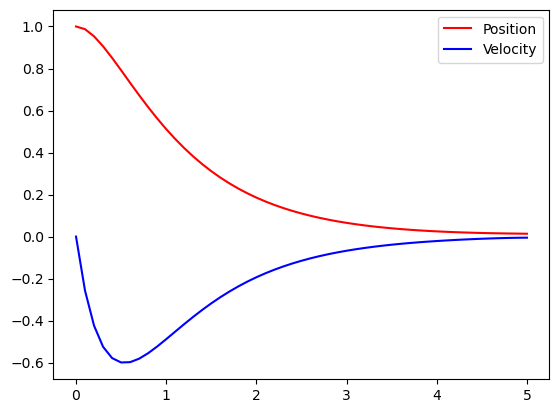

PyObject <matplotlib.legend.Legend object at 0x0000000000F698B0>

In [21]:
plot(times, x_hist[1,:], "r", label="Position")
plot(times, x_hist[2,:], "b", label="Velocity")
legend()

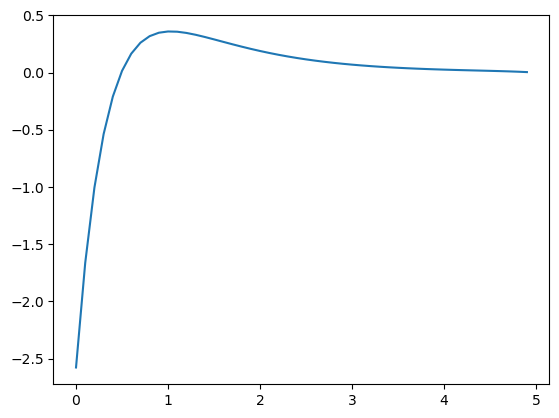

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000010051C0>

In [12]:
plot(times[1:N-1],u_hist[:])